In [6]:
#1 : se placer à la racine
import os
import ipynbname

chemin_notebook = ipynbname.path()
dossier_notebook = os.path.dirname(chemin_notebook)
os.chdir(dossier_notebook)
os.chdir('../..')
print("Répertoire actuel :", os.getcwd())
from Utils.embedding import *

Répertoire actuel : /Users/dan2/Desktop/Télécom-master-spé/Projets_perso/Deep/Showdown_AI/my_showdown_ai_git


In [7]:
import numpy as np

type_idx = {
    0: "normal",
    1: "fire",
    2: "water",
    3: "electric",
    4: "grass",
    5: "ice",
    6: "fighting",
    7: "poison",
    8: "ground",
    9: "flying",
    10: "psychic",
    11: "bug",
    12: "rock",
    13: "ghost",
    14: "dragon",
    15: "dark",
    16: "steel"
}



Il faut pouvoir capturer les relations entre types, next step = représentation par graphe ?

***ON PASSE A DES GRAPHES***

In [8]:
type_chart = {
    "normal":   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0, 1, 1, 0.5],
    "fire":     [1, 0.5, 0.5, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0.5, 1, 0.5, 1, 2],
    "water":    [1, 2, 0.5, 1, 0.5, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0.5, 1, 1],
    "electric": [1, 1, 2, 0.5, 0.5, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0.5, 1, 1],
    "grass":    [1, 0.5, 2, 1, 0.5, 1, 1, 0.5, 2, 0.5, 1, 0.5, 2, 1, 0.5, 1, 0.5],
    "ice":      [1, 0.5, 0.5, 1, 2, 0.5, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0.5],
    "fighting": [2, 1, 1, 1, 1, 2, 1, 0.5, 1, 0.5, 0.5, 0.5, 2, 0, 1, 2, 2],
    "poison":   [1, 1, 1, 1, 2, 1, 1, 0.5, 0.5, 1, 1, 1, 0.5, 0.5, 1, 1, 0],
    "ground":   [1, 2, 1, 2, 0.5, 1, 1, 2, 1, 0, 1, 0.5, 2, 1, 1, 1, 2],
    "flying":   [1, 1, 1, 0.5, 2, 1, 2, 1, 1, 1, 1, 2, 0.5, 1, 1, 1, 0.5],
    "psychic":  [1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0.5, 1, 1, 1, 1, 0, 0.5],
    "bug":      [1, 0.5, 1, 1, 2, 1, 0.5, 0.5, 1, 0.5, 2, 1, 1, 0.5, 1, 2, 0.5],
    "rock":     [1, 2, 1, 1, 1, 2, 0.5, 1, 0.5, 2, 1, 2, 1, 1, 1, 1, 0.5],
    "ghost":    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0.5, 0.5],
    "dragon":   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0.5],
    "dark":     [1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 2, 1, 1, 2, 1, 0.5, 0.5],
    "steel":    [1, 0.5, 0.5, 0.5, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0.5]
}

In [9]:
import networkx as nx

type_names = list(type_chart.keys())
G = nx.DiGraph()

for i, t_from in enumerate(type_names):
    for j, effectiveness in enumerate(type_chart[t_from]):
        t_to = type_names[j]
        G.add_edge(t_from, t_to, weight=effectiveness)


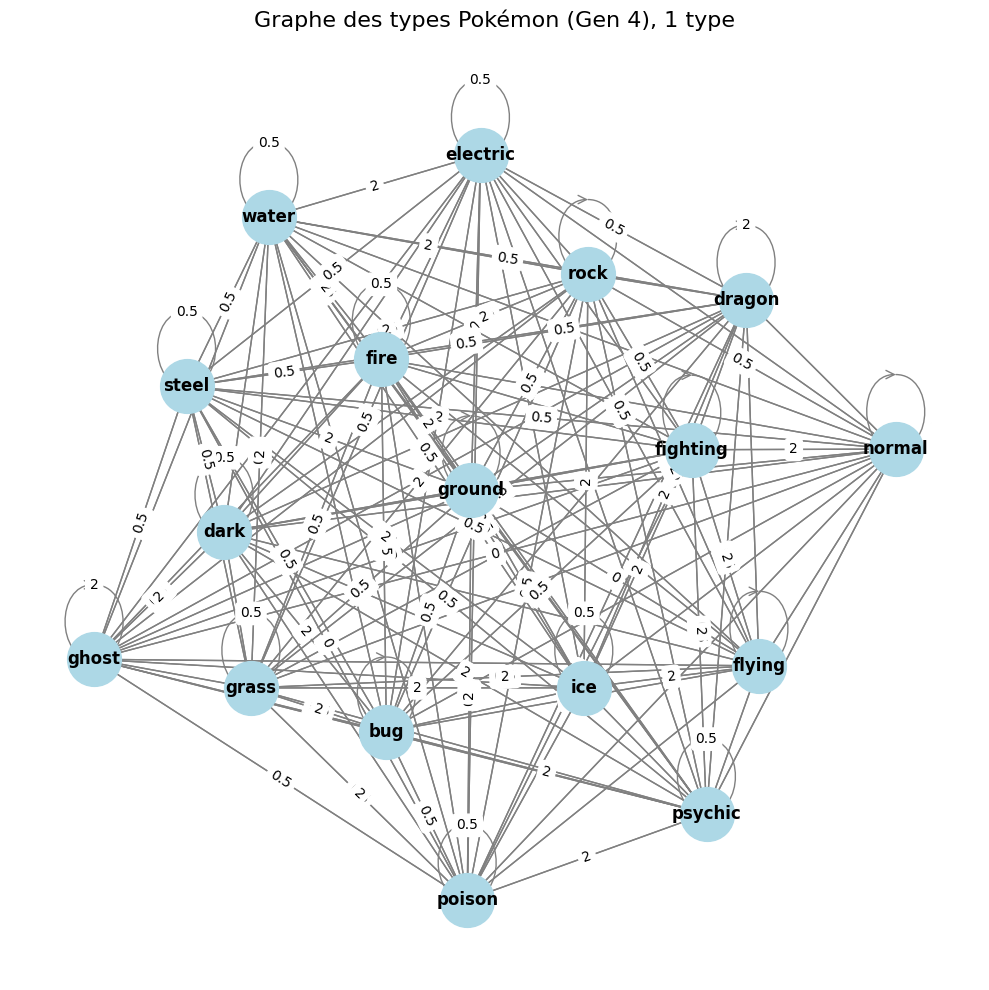

In [10]:
import matplotlib.pyplot as plt

# Générer une position pour chaque noeud (graphe propre)
pos = nx.spring_layout(G, seed=42)

# Dessiner les noeuds
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='lightblue')

# Dessiner les arêtes
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, edge_color='gray')

# Dessiner les labels des noeuds
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Ajouter les poids (efficacité des types) sur les arêtes
edge_labels = nx.get_edge_attributes(G, 'weight')
# Ne pas afficher les arêtes à 1 (neutre)
edge_labels = {k: v for k, v in edge_labels.items() if v != 1}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Titre & layout
plt.title("Graphe des types Pokémon (Gen 4), 1 type", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
os.getcwd()

'/Users/dan2/Desktop/Télécom-master-spé/Projets_perso/Deep/Showdown_AI/my_showdown_ai_git'

In [12]:
import json
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Charger les résistances combinées (fichier généré auparavant)
with open("json/gen4_combined_type_resistances.json", "r", encoding="utf-8") as f:
    type_resistances = json.load(f)

# Créer le graphe
G = nx.Graph()

# Ajouter les nœuds et leurs vecteurs
for type_combo, resistances in type_resistances.items():
    vec = list(resistances.values())
    G.add_node(type_combo, resistance_vector=vec)

# Extraire tous les vecteurs dans l'ordre des nœuds
keys = list(G.nodes())
vectors = np.array([G.nodes[k]["resistance_vector"] for k in keys])

# Calculer la matrice de similarité cosinus
similarity_matrix = cosine_similarity(vectors)

threshold = 0.92

# Ajouter les arêtes pondérées
for i, type1 in enumerate(keys):
    for j in range(i + 1, len(keys)):
        type2 = keys[j]
        similarity = similarity_matrix[i, j]
        if similarity > threshold :
            G.add_edge(type1, type2, weight=similarity)

# Sauvegarder le graphe si besoin :
# nx.write_gpickle(G, "gen4_type_graph.gpickle")

# Infos
print(f"Graphe généré avec {G.number_of_nodes()} types et {G.number_of_edges()} arêtes.")


Graphe généré avec 153 types et 284 arêtes.


In [13]:
print((G.nodes["normal"]["resistance_vector"]))

[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]


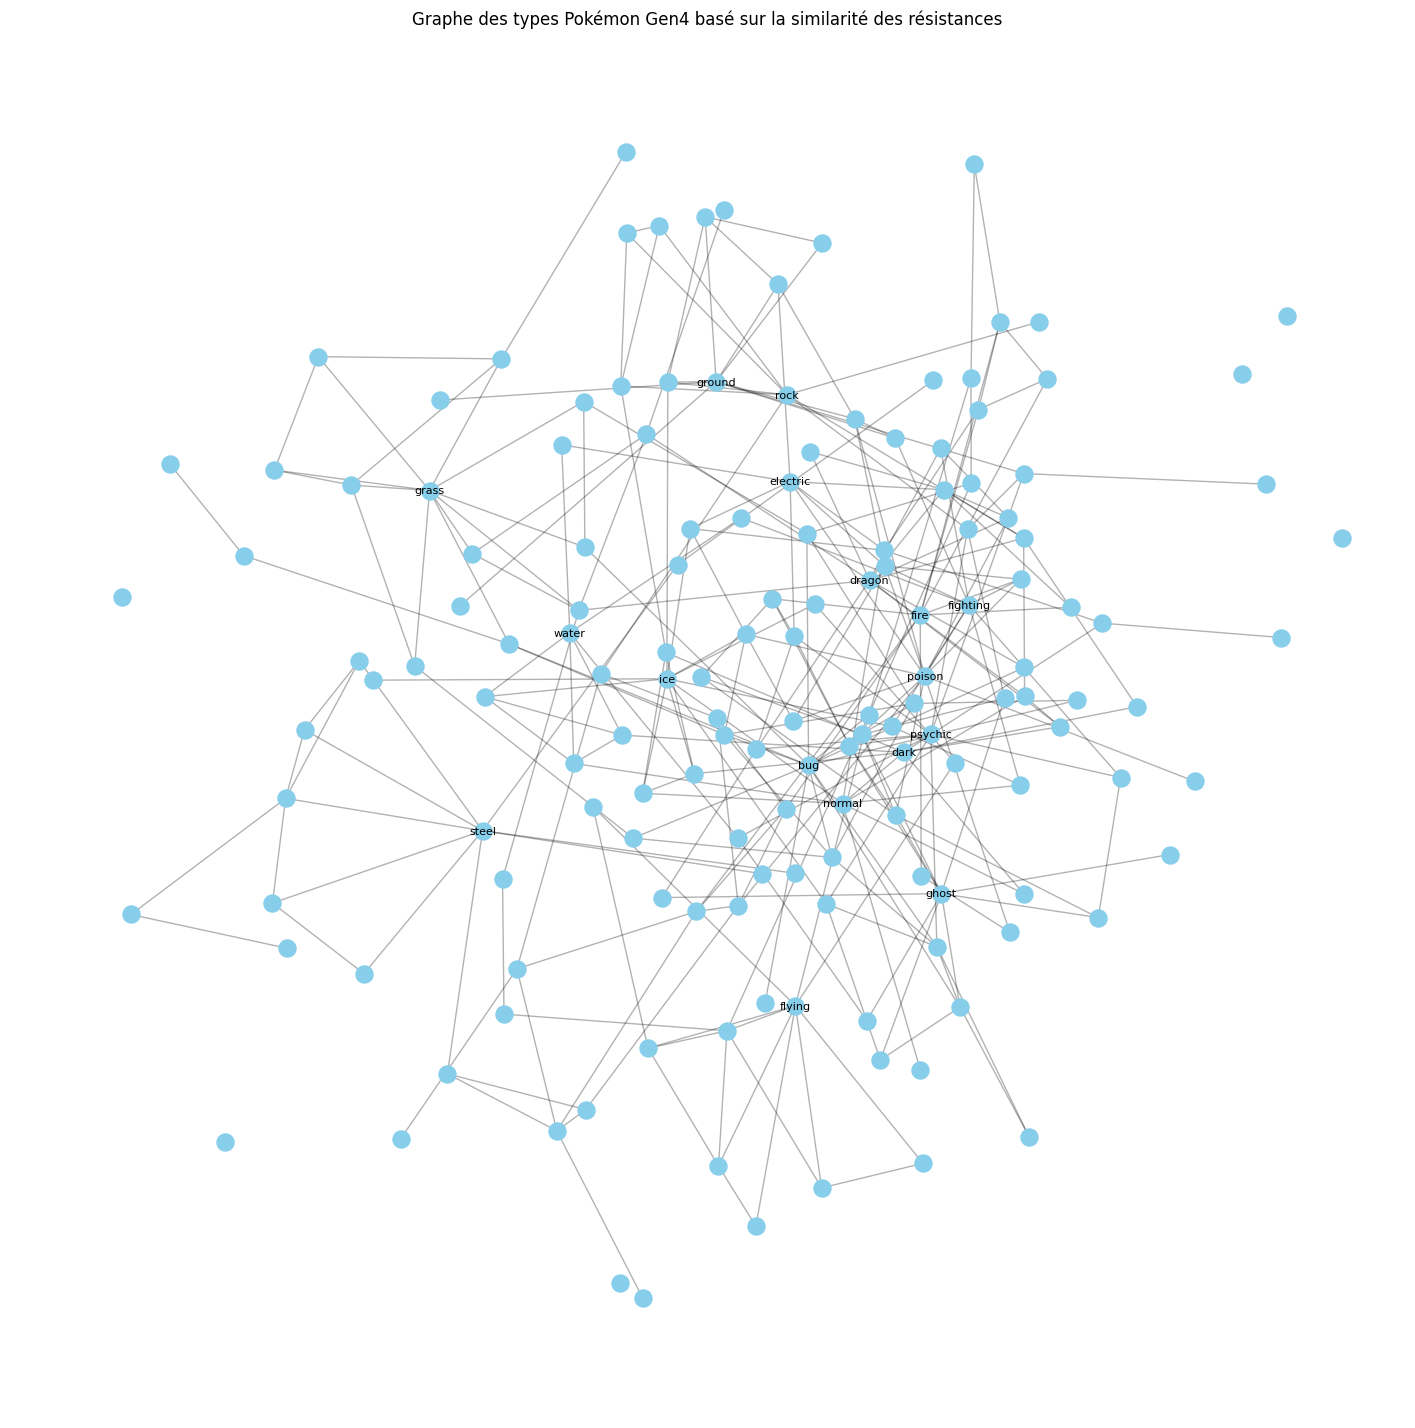

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Optionnel : filtrer les arêtes trop faibles pour ne pas surcharger le graphe
edge_threshold = 0.9  # Garde uniquement les similarités fortes
edges_to_draw = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] >= edge_threshold]

# Position des nœuds
pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

# Dessiner les nœuds
plt.figure(figsize=(18, 18))
nx.draw_networkx_nodes(G, pos, node_size=150, node_color="skyblue")

# Dessiner les arêtes filtrées par poids
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edges_to_draw,
    width=1,
    alpha=0.3
)

# Optionnel : noms visibles uniquement pour les types simples
labels = {node: node for node in G.nodes if "_" not in node}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

plt.title("Graphe des types Pokémon Gen4 basé sur la similarité des résistances")
plt.axis("off")
plt.show()


In [15]:
import torch
from torch_geometric.data import Data
import numpy as np

# 1. Feature matrix X (153, 17)
X = torch.tensor(
    [G.nodes[node]['resistance_vector'] for node in G.nodes],
    dtype=torch.float
)

# 2. Edge index (2, num_edges)
edge_index = torch.tensor(
    [[list(G.nodes).index(u), list(G.nodes).index(v)] for u, v in G.edges],
    dtype=torch.long
).t().contiguous()

# 3. Optionnel : edge_weight
edge_weight = torch.tensor(
    [G.edges[u, v]['weight'] for u, v in G.edges],
    dtype=torch.float
)

# 4. Créer l’objet PyG Data
data = Data(x=X, edge_index=edge_index, edge_weight=edge_weight)


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN_Autoencoder(nn.Module):
    def __init__(self, in_channels=17, hidden_channels=32, embedding_dim=5):
        super().__init__()
        # Encoder (GCN)
        self.encoder = nn.Sequential(
            GCNConv(in_channels, hidden_channels),
            nn.ReLU(),
            GCNConv(hidden_channels, embedding_dim)
        )
        # Decoder (MLP classique)
        self.decoder = nn.Sequential(
            nn.Linear(embedding_dim, 32),
            nn.ReLU(),
            nn.Linear(32, in_channels),
            nn.Sigmoid()  # Ou pas, selon l'échelle de tes résistances
        )

    def forward(self, x, edge_index, edge_weight=None):
        # Encoder GCN
        x = self.encoder[0](x, edge_index, edge_weight)
        x = self.encoder[1](x)
        z = self.encoder[2](x, edge_index, edge_weight)  # Embedding latent
        z = F.normalize(z,p=2,dim=1)

        # Decoder
        recon = 4* self.decoder(z) #Valeur de résistance comprise entre 0 et 4 donc *4

        return z, recon



In [17]:
# Data = objet PyG contenant x, edge_index, edge_weight
model = GCN_Autoencoder()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

model.train()
epochs = 200

for epoch in range(epochs):
    optimizer.zero_grad()
    z, recon = model(data.x, data.edge_index, data.edge_weight)
    loss = loss_fn(recon, data.x)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss.item():.6f}")


Epoch 000 | Loss: 1.440417
Epoch 010 | Loss: 0.531394
Epoch 020 | Loss: 0.487137
Epoch 030 | Loss: 0.443710
Epoch 040 | Loss: 0.373198
Epoch 050 | Loss: 0.328431
Epoch 060 | Loss: 0.299113
Epoch 070 | Loss: 0.266186
Epoch 080 | Loss: 0.239157
Epoch 090 | Loss: 0.224327
Epoch 100 | Loss: 0.213256
Epoch 110 | Loss: 0.204528
Epoch 120 | Loss: 0.197450
Epoch 130 | Loss: 0.191084
Epoch 140 | Loss: 0.184637
Epoch 150 | Loss: 0.177052
Epoch 160 | Loss: 0.172345
Epoch 170 | Loss: 0.167759
Epoch 180 | Loss: 0.163436
Epoch 190 | Loss: 0.160213


In [18]:
model.eval()
with torch.no_grad():
    final_embeddings, _ = model(data.x, data.edge_index, data.edge_weight)

type_names = list(G.nodes)
dict_type_embeddings = {
    name: final_embeddings[i].tolist()
    for i, name in enumerate(type_names)
}


In [19]:
print(dict_type_embeddings["normal"])
z = dict_type_embeddings["normal"]
z = torch.Tensor(z)
print(model.decoder(z))

[-0.4663883149623871, -0.5396283268928528, -0.4958411157131195, -0.27534517645835876, -0.4118371307849884]
tensor([0.2362, 0.2756, 0.1999, 0.2178, 0.2818, 0.2057, 0.5134, 0.2357, 0.2910,
        0.3076, 0.2455, 0.3334, 0.2636, 0.1390, 0.2758, 0.1798, 0.3116],
       grad_fn=<SigmoidBackward0>)


J'ai construit un encodeur qui compresse le vecteur de résistance. Je m'en fiche de décrire mon type en fait ce qui m'importe c'est mes résistances et faiblesses. Je le sauvegarde : 

In [20]:
#with open("json/dict_type_embeddings.json", "w", encoding="utf-8") as f:
#    json.dump(dict_type_embeddings, f, indent=2)

#J'enlève cette cellule pour éviter d'écraser mon dictionnaire

Maintenant je me sers de ce notebook pour encoder proprement type_embedding.py

In [21]:
#On charge le dictionnaire {type : embedding}
with open("json/dict_type_embeddings.json", "r", encoding="utf-8") as f:
    dict_type_embeddings = json.load(f)

In [22]:
print(len(dict_type_embeddings.keys())) # OK

153


In [27]:
print(type(dict_type_embeddings["normal"]))

<class 'list'>


In [35]:
t = dict_type_embeddings["normal"]
print(t)
tensor = torch.tensor(t,dtype=torch.float32)
print(tensor[0])

[-0.4663883149623871, -0.5396283268928528, -0.4958411157131195, -0.27534517645835876, -0.4118371307849884]
tensor(-0.4664)


In [ ]:
type_idx = {
    'normal': 0,
    'fire': 1,
    'water': 2,
    'electric': 3,
    'grass': 4,
    'ice': 5,
    'fighting': 6,
    'poison': 7,
    'ground': 8,
    'flying': 9,
    'psychic': 10,
    'bug': 11,
    'rock': 12,
    'ghost': 13,
    'dragon': 14,
    'dark': 15,
    'steel': 16
}

In [ ]:
from poke_env.environment.pokemon import Pokemon


p = Pokemon(gen=4, species="absol")

print(p.type_1.name.lower())

dark


In [ ]:
def get_type_embedding_from_pokemon(p : Pokemon) -> torch.Tensor : 
    """reçoit un pokemon, renvoie l'embedding de son type"""
    if p.type_2 : #Si 2 types
        if type_idx[p.type_2.name.lower()] > type_idx[p.type_1.name.lower()] :
            key_type = p.type_1.name.lower() + "_" + p.type_2.name.lower()

        else : 
            key_type = p.type_2.name.lower() + "_" + p.type_1.name.lower()

    else : #Sinon
        key_type = p.type_1.name.lower()

    return dict_type_embeddings[key_type]

In [ ]:
print(get_type_embedding_from_pokemon(p))

[-0.3895009756088257, -0.34791111946105957, 0.3342834413051605, -0.6831769347190857, 0.3857080936431885]


In [ ]:
#Viabilité du dictionnaire testé sur Absol et Abomasnow, fonctionnel ✅✅

On s'arrête là